In [1]:
# Import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Formatting Visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

MIN_VOTES = 50

def add_labels_to_bars(ax, format_str='{:,.0f}'):
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               format_str.format(height),
               ha='center', va='bottom', fontsize=9, fontweight='bold')

# SECTION 1: DATA LOADING & EXPLORATION

In [3]:
# Data Loading
def load_data() :
    restaurant = pd.read_csv('enhanced_zomato_dataset_clean.csv')

    print("Dataset loaded successfully")
    print(f"Dataset shape : {restaurant.shape}")

    return restaurant

In [4]:
# Data Exploration 
def initial_exploration (restaurant) :
    print("\n",restaurant.head())
    print("\n",restaurant.info())

    print("\n--- Basic Statistics ---")
    print(f"Number of Cities : {restaurant['City'].nunique()}")
    print(f"Number of Restaurants : {restaurant['Restaurant_Name'].nunique()}")
    print(f"Number of Cuisines : {restaurant['Cuisine'].nunique()}")
    print(f"Number of Item Variety : {restaurant['Item_Name'].nunique()}")

In [5]:
#Data Quality Check
def data_quality(restaurant):
    print("\n--- Data Quality Check ---")
    missing = restaurant.isnull().sum()
    missing_pct = (missing / len(restaurant) * 100).round(2)

    if missing.sum() > 0 :
        print("\nColumns with missing values :")
        for col in missing[missing > 0].index:
            print(f"{col} : {missing[col]:,} ({missing_pct[col]:.1f}%)")
    else : 
        print("No missing values found")

    print("\n--- Key Metrics Summary ---")
    print(f"Rating Range: {restaurant['Average_Rating'].min():.2f} - {restaurant['Average_Rating'].max():.2f}")
    print(f"Price Range: ₹{restaurant['Prices'].min():.0f} - ₹{restaurant['Prices'].max():.0f}")
    print(f"Votes Range: {restaurant['Total_Votes'].min():.0f} - {restaurant['Total_Votes'].max():.0f}")

In [6]:
#Data Cleaning
def clean_data(restaurant):
    print("\n--- Data Cleaning ---")
    original_size = len(restaurant)
    
    # Remove rows with missing critical values
    restaurant_clean = restaurant.dropna(subset=['Average_Rating', 'Prices', 'Total_Votes']).copy()
    
    removed = original_size - len(restaurant_clean)
    print(f"Removed {removed:,} rows with missing critical values")
    print(f"✓ Clean dataset: {len(restaurant_clean):,} rows")
    
    return restaurant_clean

# SECTION 2: RATING ANALYSIS

In [7]:
def analyze_ratings(restaurant) :
    rating_cols = ['Dining_Rating', 'Delivery_Rating', 'Average_Rating']

    print("\n--- Rating Statistics ---")
    for col in rating_cols:
        if col in restaurant.columns:
            print(f"\n{col}:")
            print(f"  Count: {restaurant[col].count():,}")
            print(f"  Mean: {restaurant[col].mean():.2f}")
            print(f"  Median: {restaurant[col].median():.2f}")
            print(f"  Std Dev: {restaurant[col].std():.2f}")
            print(f"  Min: {restaurant[col].min():.2f}")
            print(f"  Max: {restaurant[col].max():.2f}")

In [8]:
def plot_ratings(restaurant) :
    
    print("\n--- Graphs ---")
    fig, axes = plt.subplots(2,2, figsize = (16, 10))
    
    if 'Dining_Rating' in restaurant.columns:
        axes[0, 0].hist(
            restaurant['Dining_Rating'].dropna(), 
            bins=20, 
            color='steelblue', 
            edgecolor='black', 
            alpha=0.7)
        axes[0, 0].axvline(
            restaurant['Dining_Rating'].mean(), 
            color='red',
            linestyle='--', 
            linewidth=2,
            label=f"Mean: {restaurant['Dining_Rating'].mean():.2f}")
        axes[0, 0].axvline(
            restaurant['Dining_Rating'].median(), 
            color='green',
            linestyle='--', 
            linewidth=2,
            label=f"Median: {restaurant['Dining_Rating'].median():.2f}")
        
        axes[0, 0].set_xlabel('Dining Rating', fontsize=12)
        axes[0, 0].set_ylabel('Frequency', fontsize=12)
        axes[0, 0].set_title('Dining Rating Distribution', fontsize=14, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)

    if 'Delivery_Rating' in restaurant.columns:
        axes[0, 1].hist(
            restaurant['Delivery_Rating'].dropna(), 
            bins=20,
            color='coral', 
            edgecolor='black', 
            alpha=0.7)
        axes[0, 1].axvline(
            restaurant['Delivery_Rating'].mean(), 
            color='red',
            linestyle='--', 
            linewidth=2,
            label=f"Mean: {restaurant['Delivery_Rating'].mean():.2f}")
        axes[0, 1].axvline(
            restaurant['Delivery_Rating'].median(), 
            color='green',
            linestyle='--',
            linewidth=2,
            label=f"Median: {restaurant['Delivery_Rating'].median():.2f}")
        
        axes[0, 1].set_xlabel('Delivery Rating', fontsize=12)
        axes[0, 1].set_ylabel('Frequency', fontsize=12)
        axes[0, 1].set_title('Delivery Rating Distribution', fontsize=14, fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(alpha=0.3)
    
    # Average Rating
    if 'Average_Rating' in restaurant.columns:
        axes[1, 0].hist(
            restaurant['Average_Rating'].dropna(), 
            bins=20,
            color='lightgreen', 
            edgecolor='black', 
            alpha=0.7)
        axes[1, 0].axvline(
            restaurant['Average_Rating'].mean(), 
            color='red',
            linestyle='--', 
            linewidth=2,
            label=f"Mean: {restaurant['Average_Rating'].mean():.2f}")
        axes[1, 0].axvline(
            restaurant['Average_Rating'].median(), 
            color='green',
            linestyle='--',
            linewidth=2,
            label=f"Median: {restaurant['Average_Rating'].median():.2f}")
        
        axes[1, 0].set_xlabel('Average Rating', fontsize=12)
        axes[1, 0].set_ylabel('Frequency', fontsize=12)
        axes[1, 0].set_title('Average Rating Distribution', fontsize=14, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(alpha=0.3)
    
    rating_data = []
    rating_labels = []
    for col in ['Dining_Rating', 'Delivery_Rating', 'Average_Rating']:
        if col in restaurant.columns:
            rating_data.append(restaurant[col].dropna())
            rating_labels.append(col.replace('_', ' '))
    
    axes[1, 1].boxplot(rating_data, labels=rating_labels, patch_artist=True)
    axes[1, 1].set_ylabel('Rating', fontsize=12)
    axes[1, 1].set_title('Rating Comparison', fontsize=14, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Rating plots created")

# SECTION 3: PRICE ANALYSIS

In [9]:
def analyze_prices(restaurant):
    print(f"Count: {restaurant['Prices'].count():,}")
    print(f"Mean: ₹{restaurant['Prices'].mean():.2f}")
    print(f"Median: ₹{restaurant['Prices'].median():.2f}")
    print(f"Std Dev: ₹{restaurant['Prices'].std():.2f}")
    print(f"Min: ₹{restaurant['Prices'].min():.2f}")
    print(f"Max: ₹{restaurant['Prices'].max():.2f}")

    print("\nPrice percentiles")
    for p in [25, 50, 75, 90, 95, 99]:
        print(f"{p}th : ₹{restaurant['Prices'].quantile(p/100):.2f}")
    
    print(f"\nSkewness : {restaurant['Prices'].skew():.2f}")
    if restaurant['Prices'].skew() > 1:
        print("→ Highly right-skewed (most items cheap, few expensive)")

In [10]:
def plot_prices(restaurant) :
    
    print("\n--- Graphs ---")
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Full range histogram
    axes[0].hist(restaurant['Prices'], 
                bins=50, 
                color='coral',
                edgecolor='black',
                alpha=0.7)
    axes[0].axvline(restaurant['Prices'].mean(),
                    color='red',
                    linestyle='--', 
                    linewidth=2,
                    label=f"Mean: ₹{restaurant['Prices'].mean():.0f}")
    axes[0].axvline(restaurant['Prices'].median(),
                    color='green',
                    linestyle='--', 
                    linewidth=2,
                    label=f"Median: ₹{restaurant['Prices'].median():.0f}")
    axes[0].set_xlabel('Price (₹)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Price Distribution (Full Range)', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Zoomed (95th percentile)
    p95 = restaurant['Prices'].quantile(0.95)
    prices_zoomed = restaurant[restaurant['Prices'] <= p95]['Prices']
    axes[1].hist(prices_zoomed,
                bins=40, 
                color='lightgreen',
                edgecolor='black', 
                alpha=0.7)
    axes[1].set_xlabel('Price (₹)', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].set_title(f'Price Distribution (Bottom 95%)', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    # Box plot
    axes[2].boxplot(restaurant['Prices'], vert=True, patch_artist=True)
    axes[2].set_ylabel('Price (₹)', fontsize=12)
    axes[2].set_title('Price Box Plot', fontsize=14, fontweight='bold')
    axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Price ranges
    print("\n--- Price Range Distribution ---")
    bins = [0, 100, 200, 300, 500, 1000, restaurant['Prices'].max() + 1]
    labels = ['₹0-100', '₹100-200', '₹200-300', '₹300-500', '₹500-1000', '₹1000+']
    price_ranges = pd.cut(restaurant['Prices'], bins=bins, labels=labels)
    
    for label in labels:
        count = (price_ranges == label).sum()
        pct = count / len(restaurant) * 100
        print(f"  {label}: {count:,} items ({pct:.1f}%)")
    
    print("✓ Price plots created")

# SECTION 4: CATEGORICAL BREAKDOWN

In [11]:
def analyze_categories(restaurant) :
    print("\n--- Top 10 Cities ---")
    city_counts = restaurant['City'].value_counts().head(10)
    for city, count in city_counts.items():
        print(f" {city} : {count :,} items ({count/len(restaurant)*100:.1f}%)")
    
    print("\n--- Top 10 Cuisines ---")
    cuisine_counts = restaurant['Cuisine'].value_counts().head(10)
    for cuisine, count in cuisine_counts.items():
        print(f"  {cuisine}: {count:,} items ({count/len(restaurant)*100:.1f}%)")

    if 'Is_Bestseller' in restaurant.columns:
        print("\n---Bestseller Distribution ---")
        bs_counts = restaurant['Is_Bestseller'].value_counts()
        print(f" Bestseller : {bs_counts.get(1,0):,} ({bs_counts.get(1, 0)/len(restaurant)*100:.1f}%)")
        print(f"  Regular: {bs_counts.get(0, 0):,} ({bs_counts.get(0, 0)/len(restaurant)*100:.1f}%)")

In [12]:
def plot_categories(restaurant):
    
    print("\n--- Graphs ---")
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Top cities
    top_cities = restaurant['City'].value_counts().head(10)
    axes[0].barh(range(len(top_cities)),
                top_cities.values,
                color='teal', 
                edgecolor='black')
    axes[0].set_yticks(range(len(top_cities)))
    axes[0].set_yticklabels(top_cities.index)
    axes[0].set_xlabel('Count', fontsize=12)
    axes[0].set_title('Top 10 Cities', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Top cuisines
    top_cuisines = restaurant['Cuisine'].value_counts().head(10)
    axes[1].barh(range(len(top_cuisines)),
                top_cuisines.values,
                color='orange', 
                edgecolor='black')
    axes[1].set_yticks(range(len(top_cuisines)))
    axes[1].set_yticklabels(top_cuisines.index)
    axes[1].set_xlabel('Count', fontsize=12)
    axes[1].set_title('Top 10 Cuisines', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    # Bestsellers
    if 'Is_Bestseller' in restaurant.columns:
        bs_counts = restaurant['Is_Bestseller'].value_counts()
        axes[2].bar(['Regular', 'Bestseller'],
                   [bs_counts.get(0, 0), 
                    bs_counts.get(1, 0)],
                   color=['lightgray', 'gold'], 
                   edgecolor='black', 
                   linewidth=2)
        axes[2].set_ylabel('Count', fontsize=12)
        axes[2].set_title('Bestsellers vs Regular', fontsize=14, fontweight='bold')
        axes[2].grid(axis='y', alpha=0.3)
        add_labels_to_bars(axes[2])
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Category plots created")

# SECTION 5: DINING VS DELIVERY COMPARISON

In [13]:
def compare_dining_delivery(restaurant) :
    df_both = restaurant[(restaurant['Dining_Rating'].notna()) & 
                 (restaurant['Delivery_Rating'].notna())].copy()
    
    print(f"\nAnalyzing {len(df_both):,} items with both ratings")
    
    dining_mean = df_both['Dining_Rating'].mean()
    delivery_mean = df_both['Delivery_Rating'].mean()
    correlation = df_both['Dining_Rating'].corr(df_both['Delivery_Rating'])
    
    print(f"\nDining Mean: {dining_mean:.2f}")
    print(f"Delivery Mean: {delivery_mean:.2f}")
    print(f"Difference: {abs(dining_mean - delivery_mean):.2f}")
    print(f"Correlation: {correlation:.3f}")
    
    # Calculate gap
    df_both['Rating_Gap'] = df_both['Dining_Rating'] - df_both['Delivery_Rating']
    print(f"\nMean Gap (Dining - Delivery): {df_both['Rating_Gap'].mean():.2f}")


In [14]:
def plot_dining_delivery(restaurant):
    df_both = restaurant[(restaurant['Dining_Rating'].notna()) & 
                 (restaurant['Delivery_Rating'].notna())].copy()
    df_both['Rating_Gap'] = df_both['Dining_Rating'] - df_both['Delivery_Rating']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Scatter plot
    correlation = df_both['Dining_Rating'].corr(df_both['Delivery_Rating'])
    axes[0].scatter(df_both['Dining_Rating'], df_both['Delivery_Rating'], alpha=0.3, s=10, color='purple')
    axes[0].plot([1, 5], [1, 5], 'r--', linewidth=2, label='Equal Ratings')
    axes[0].set_xlabel('Dining Rating', fontsize=12)
    axes[0].set_ylabel('Delivery Rating', fontsize=12)
    axes[0].set_title(f'Dining vs Delivery (r={correlation:.3f})', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Gap distribution
    axes[1].hist(df_both['Rating_Gap'], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[1].axvline(0, color='black', linestyle='--', linewidth=2)
    axes[1].set_xlabel('Dining - Delivery Rating', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].set_title('Rating Gap Distribution', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    # Box plot
    axes[2].boxplot([df_both['Dining_Rating'], df_both['Delivery_Rating']], labels=['Dining', 'Delivery'], patch_artist=True)
    axes[2].set_ylabel('Rating', fontsize=12)
    axes[2].set_title('Rating Comparison', fontsize=14, fontweight='bold')
    axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Dining vs Delivery plots created")

# SECTION 6: PRICE VS RATING RELATIONSHIP

In [15]:
def analyze_price_rating_relation (restaurant):
    correlation = restaurant['Prices'].corr(restaurant['Average_Rating'])

    if abs(correlation) < 0.1:
        print("→ Very weak correlation (price doesn't predict rating)")
    elif abs(correlation) < 0.3:
        print("→ Weak correlation")
    elif abs(correlation) < 0.7:
        print("→ Moderate correlation")
    else:
        print("→ Strong correlation")

In [16]:
def plot_price_rating(restaurant) :
    print("\n--- Creating Price vs Rating Visualizations ---")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Scatter plot
    correlation = restaurant['Prices'].corr(restaurant['Average_Rating'])
    axes[0].scatter(restaurant['Prices'], restaurant['Average_Rating'],
                   alpha=0.3, s=10, color='teal')
    axes[0].set_xlabel('Price (₹)', fontsize=12)
    axes[0].set_ylabel('Average Rating', fontsize=12)
    axes[0].set_title(f'Price vs Rating (r={correlation:.3f})',
                     fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Average rating by price range
    bins = [0, 100, 200, 300, 500, 1000, restaurant['Prices'].max() + 1]
    labels = ['₹0-100', '₹100-200', '₹200-300', '₹300-500', '₹500-1000', '₹1000+']
    restaurant['Price_Range'] = pd.cut(restaurant['Prices'], bins=bins, labels=labels)
    
    price_range_ratings = restaurant.groupby('Price_Range')['Average_Rating'].mean()
    
    axes[1].bar(range(len(price_range_ratings)), price_range_ratings.values,
               color='lightgreen', edgecolor='black')
    axes[1].set_xticks(range(len(price_range_ratings)))
    axes[1].set_xticklabels(price_range_ratings.index, rotation=45, ha='right')
    axes[1].set_ylabel('Average Rating', fontsize=12)
    axes[1].set_title('Average Rating by Price Range', fontsize=14, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    add_labels_to_bars(axes[1], format_str='{:.2f}')
    
    plt.tight_layout()
    plt.show()
    
    print("\n--- Average Rating by Price Range ---")
    for price_range, rating in price_range_ratings.items():
        count = (restaurant['Price_Range'] == price_range).sum()
        print(f"  {price_range}: {rating:.2f} (n={count:,})")
    
    print("✓ Price vs Rating plots created")

# SECTION 7: CUISINE DEEP DIVE

In [17]:
def analyze_cuisines (restaurant, min_votes):
    df_filtered = restaurant[restaurant['Total_Votes'] >= min_votes].copy()
    print(f"\nUsing {len(df_filtered):,} items with {min_votes}+ votes")

    cuisine_stats = df_filtered.groupby('Cuisine').agg({
        'Average_Rating' : 'mean',
        'Prices' : 'mean',
        'Is_Bestseller' : 'mean',
        'Item_Name' : 'count'
    }).reset_index()

    cuisine_stats.columns = ['Cuisine', 'Avg_Rating', 'Avg_Price', 'Bestseller_Ratio', 'Count']
    cuisine_stats = cuisine_stats[cuisine_stats['Count'] >= 10]
    cuisine_stats = cuisine_stats.sort_values('Avg_Rating', ascending = False)

    print(f"Analyzing {len(cuisine_stats)} cuisines with 10+ items\n")

    print("--- top 10 by Rating ---")
    for idx, row in cuisine_stats.head(10).iterrows():
        print(f" {row['Cuisine']}: {row['Avg_Rating']:.2f}" 
              f"(₹{row['Avg_Price']:.0f}, {row['Count']:.0f} items)")
        
    print("\n--- Top 10 Most Expensive ---")
    top_expensive = cuisine_stats.nlargest(10, 'Avg_Price')
    for idx, row in top_expensive.iterrows():
        print(f" {row['Cuisine']} : ₹{row['Avg_Price']:.0f}"
              f"(rating : {row['Avg_Rating']:.2f})")
    
    return cuisine_stats

In [18]:
def plot_cuisines(cuisine_stats):
    
    print("\n--- Creating Cuisine Visualizations ---")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Top rated
    top15_rated = cuisine_stats.head(15)
    axes[0, 0].barh(range(len(top15_rated)), top15_rated['Avg_Rating'].values,
                   color='steelblue', edgecolor='black')
    axes[0, 0].set_yticks(range(len(top15_rated)))
    axes[0, 0].set_yticklabels(top15_rated['Cuisine'].values)
    axes[0, 0].set_xlabel('Average Rating', fontsize=12)
    axes[0, 0].set_title('Top 15 Cuisines by Rating', fontsize=14, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # Most expensive
    top15_expensive = cuisine_stats.nlargest(15, 'Avg_Price')
    axes[0, 1].barh(range(len(top15_expensive)), top15_expensive['Avg_Price'].values,
                   color='coral', edgecolor='black')
    axes[0, 1].set_yticks(range(len(top15_expensive)))
    axes[0, 1].set_yticklabels(top15_expensive['Cuisine'].values)
    axes[0, 1].set_xlabel('Average Price (₹)', fontsize=12)
    axes[0, 1].set_title('Top 15 Most Expensive Cuisines', fontsize=14, fontweight='bold')
    axes[0, 1].grid(axis='x', alpha=0.3)
    
    # Bestseller ratio
    top15_bestseller = cuisine_stats.nlargest(15, 'Bestseller_Ratio')
    axes[1, 0].barh(range(len(top15_bestseller)),
                   top15_bestseller['Bestseller_Ratio'].values * 100,
                   color='gold', edgecolor='black')
    axes[1, 0].set_yticks(range(len(top15_bestseller)))
    axes[1, 0].set_yticklabels(top15_bestseller['Cuisine'].values)
    axes[1, 0].set_xlabel('Bestseller Ratio (%)', fontsize=12)
    axes[1, 0].set_title('Top 15 by Bestseller %', fontsize=14, fontweight='bold')
    axes[1, 0].grid(axis='x', alpha=0.3)
    
    # Price vs Rating
    axes[1, 1].scatter(cuisine_stats['Avg_Price'], cuisine_stats['Avg_Rating'],
                      s=cuisine_stats['Count']*2, alpha=0.5, color='purple')
    axes[1, 1].set_xlabel('Average Price (₹)', fontsize=12)
    axes[1, 1].set_ylabel('Average Rating', fontsize=12)
    axes[1, 1].set_title('Cuisine: Price vs Rating (size=count)',
                        fontsize=14, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Cuisine plots created")

# SECTION 8: GEOGRAPHIC ANALYSIS

In [19]:
def analyze_cities (restaurant, min_votes):
    df_filtered = restaurant[restaurant['Total_Votes'] >= min_votes].copy()

    city_stats = df_filtered.groupby('City').agg({
        'Average_Rating' : 'mean',
        'Prices' : 'mean',
        'Restaurant_Name' : 'nunique',
        'Cuisine' : 'nunique'
    }).reset_index()

    city_stats.columns = ['City', 'Avg_Rating', 'Avg_Price', 
                          'Num_Restaurants', 'Num_Cuisines']
    city_stats = city_stats.sort_values('Avg_Rating', ascending=False)
    
    print("\n--- Top 10 Cities by Rating ---")
    for idx, row in city_stats.head(10).iterrows():
        print(f"  {row['City']}: {row['Avg_Rating']:.2f} "
              f"(₹{row['Avg_Price']:.0f}, {row['Num_Restaurants']:.0f} restaurants)")
    
    print("\n--- Most Expensive Cities ---")
    top_expensive = city_stats.nlargest(10, 'Avg_Price')
    for idx, row in top_expensive.iterrows():
        print(f"  {row['City']}: ₹{row['Avg_Price']:.0f} "
              f"(rating: {row['Avg_Rating']:.2f})")
    
    return city_stats

In [20]:
def plot_cities(city_stats):
    print("\n--- Creating City Visualizations ---")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Top rated cities
    top10_cities = city_stats.head(10)
    axes[0, 0].barh(range(len(top10_cities)), top10_cities['Avg_Rating'].values,
                   color='teal', edgecolor='black')
    axes[0, 0].set_yticks(range(len(top10_cities)))
    axes[0, 0].set_yticklabels(top10_cities['City'].values)
    axes[0, 0].set_xlabel('Average Rating', fontsize=12)
    axes[0, 0].set_title('Top 10 Cities by Rating', fontsize=14, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # Most expensive cities
    top_expensive = city_stats.nlargest(10, 'Avg_Price')
    axes[0, 1].barh(range(len(top_expensive)), top_expensive['Avg_Price'].values,
                   color='orange', edgecolor='black')
    axes[0, 1].set_yticks(range(len(top_expensive)))
    axes[0, 1].set_yticklabels(top_expensive['City'].values)
    axes[0, 1].set_xlabel('Average Price (₹)', fontsize=12)
    axes[0, 1].set_title('Most Expensive Cities', fontsize=14, fontweight='bold')
    axes[0, 1].grid(axis='x', alpha=0.3)
    
    # Most restaurants
    top_count = city_stats.nlargest(10, 'Num_Restaurants')
    axes[1, 0].barh(range(len(top_count)), top_count['Num_Restaurants'].values,
                   color='lightgreen', edgecolor='black')
    axes[1, 0].set_yticks(range(len(top_count)))
    axes[1, 0].set_yticklabels(top_count['City'].values)
    axes[1, 0].set_xlabel('Number of Restaurants', fontsize=12)
    axes[1, 0].set_title('Cities with Most Restaurants', fontsize=14, fontweight='bold')
    axes[1, 0].grid(axis='x', alpha=0.3)
    
    # Price vs Rating
    axes[1, 1].scatter(city_stats['Avg_Price'], city_stats['Avg_Rating'],
                      s=city_stats['Num_Restaurants']*2, alpha=0.5, color='red')
    axes[1, 1].set_xlabel('Average Price (₹)', fontsize=12)
    axes[1, 1].set_ylabel('Average Rating', fontsize=12)
    axes[1, 1].set_title('City: Price vs Rating (size=restaurants)',
                        fontsize=14, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ City plots created")

# SECTION 9: RESTAURANT PERFORMANCE

In [21]:
def analyze_restaurants(restaurant, min_votes):
    df_filtered = restaurant[restaurant['Total_Votes'] >= min_votes].copy()

    restaurant_stats = df_filtered.groupby('Restaurant_Name').agg({
        'Average_Rating' : 'mean',
        'Prices' : 'mean',
        'Item_Name' : 'count',
        'Is_Bestseller' : 'sum',
        'Total_Votes' : 'sum',
        'City' : 'first'
    }).reset_index()

    restaurant_stats.columns = ['Restaurant', 'Avg_Rating', 'Avg_Price', 'Menu_Size', 'Num_Bestsellers', 'Total_Votes', 'City']

    print(f"\nAnalyzing {len(restaurant_stats):,} restaurants")
    
    print("\n--- Top 20 Restaurants by Rating ---")
    top_restaurants = restaurant_stats.nlargest(20, 'Avg_Rating')
    for idx, row in top_restaurants.iterrows():
        print(f"  {row['Restaurant'][:40]}: {row['Avg_Rating']:.2f} " f"({row['Menu_Size']:.0f} items, {row['City']})")
    
    print("\n--- Restaurants with Most Bestsellers ---")
    top_bestsellers = restaurant_stats.nlargest(10, 'Num_Bestsellers')
    for idx, row in top_bestsellers.iterrows():
        bs_ratio = row['Num_Bestsellers'] / row['Menu_Size'] * 100
        print(f"  {row['Restaurant'][:40]}: {row['Num_Bestsellers']:.0f} bestsellers " f"({bs_ratio:.1f}% of menu)")

    return restaurant_stats

In [22]:
def plot_restaurants(restaurant_stats):
    print("\n--- Creating Restaurant Visualizations ---")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Top rated
    top15 = restaurant_stats.nlargest(15, 'Avg_Rating')
    axes[0, 0].barh(range(len(top15)), top15['Avg_Rating'].values,
                   color='steelblue', edgecolor='black')
    axes[0, 0].set_yticks(range(len(top15)))
    axes[0, 0].set_yticklabels([name[:30] for name in top15['Restaurant'].values],
                               fontsize=9)
    axes[0, 0].set_xlabel('Average Rating', fontsize=12)
    axes[0, 0].set_title('Top 15 Restaurants', fontsize=14, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # Menu size distribution
    axes[0, 1].hist(restaurant_stats['Menu_Size'], bins=30, color='coral',
                   edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel('Menu Size (items)', fontsize=12)
    axes[0, 1].set_ylabel('Number of Restaurants', fontsize=12)
    axes[0, 1].set_title('Menu Size Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Menu size vs Rating
    axes[1, 0].scatter(restaurant_stats['Menu_Size'], restaurant_stats['Avg_Rating'],
                      alpha=0.3, s=10, color='green')
    axes[1, 0].set_xlabel('Menu Size', fontsize=12)
    axes[1, 0].set_ylabel('Average Rating', fontsize=12)
    axes[1, 0].set_title('Menu Size vs Rating', fontsize=14, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)
    
    # Menu size categories
    bins = [0, 5, 10, 20, 50, restaurant_stats['Menu_Size'].max() + 1]
    labels = ['1-5', '6-10', '11-20', '21-50', '50+']
    restaurant_stats['Menu_Category'] = pd.cut(restaurant_stats['Menu_Size'],
                                               bins=bins, labels=labels)
    
    menu_performance = restaurant_stats.groupby('Menu_Category')['Avg_Rating'].mean()
    
    axes[1, 1].bar(range(len(menu_performance)), menu_performance.values,
                  color='lightgreen', edgecolor='black')
    axes[1, 1].set_xticks(range(len(menu_performance)))
    axes[1, 1].set_xticklabels(menu_performance.index, rotation=45, ha='right')
    axes[1, 1].set_ylabel('Average Rating', fontsize=12)
    axes[1, 1].set_title('Rating by Menu Size', fontsize=14, fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    add_labels_to_bars(axes[1, 1], format_str='{:.2f}')
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Restaurant plots created")

# SECTION 10: VALUE SEGMENTATION

In [23]:
def segment_by_value(restaurant, min_votes):

    df_filtered = restaurant[restaurant['Total_Votes'] >= min_votes].copy()
    
    median_price = df_filtered['Prices'].median()
    median_rating = df_filtered['Average_Rating'].median()
    
    print(f"\nMedian Price: ₹{median_price:.0f}")
    print(f"Median Rating: {median_rating:.2f}")
    
    # Create segments
    def categorize(row):
        if row['Prices'] >= median_price and row['Average_Rating'] >= median_rating:
            return 'Premium'
        elif row['Prices'] < median_price and row['Average_Rating'] >= median_rating:
            return 'Great Value'
        elif row['Prices'] >= median_price and row['Average_Rating'] < median_rating:
            return 'Overpriced'
        else:
            return 'Budget'
    
    df_filtered['Value_Segment'] = df_filtered.apply(categorize, axis=1)
    
    # Statistics by segment
    print("\n--- Value Segment Statistics ---")
    for segment in ['Premium', 'Great Value', 'Overpriced', 'Budget']:
        segment_data = df_filtered[df_filtered['Value_Segment'] == segment]
        count = len(segment_data)
        pct = count / len(df_filtered) * 100
        avg_rating = segment_data['Average_Rating'].mean()
        avg_price = segment_data['Prices'].mean()
        
        print(f"\n{segment}:")
        print(f"  Count: {count:,} ({pct:.1f}%)")
        print(f"  Avg Rating: {avg_rating:.2f}")
        print(f"  Avg Price: ₹{avg_price:.0f}")
    
    return df_filtered

In [24]:
def plot_value_segments(df_filtered):
    """Visualize value segmentation"""
    print("\n--- Creating Value Segment Visualizations ---")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Scatter plot with segments
    colors = {'Premium': 'gold', 'Great Value': 'green',
             'Overpriced': 'red', 'Budget': 'gray'}
    
    for segment in colors.keys():
        segment_data = df_filtered[df_filtered['Value_Segment'] == segment]
        axes[0].scatter(segment_data['Prices'], segment_data['Average_Rating'],
                      label=segment, alpha=0.4, s=10, color=colors[segment])
    
    median_price = df_filtered['Prices'].median()
    median_rating = df_filtered['Average_Rating'].median()
    
    axes[0].axhline(median_rating, color='black', linestyle='--', linewidth=1)
    axes[0].axvline(median_price, color='black', linestyle='--', linewidth=1)
    axes[0].set_xlabel('Price (₹)', fontsize=12)
    axes[0].set_ylabel('Average Rating', fontsize=12)
    axes[0].set_title('Value Segmentation (4 Quadrants)', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Segment distribution
    segment_counts = df_filtered['Value_Segment'].value_counts()
    axes[1].bar(range(len(segment_counts)), segment_counts.values,
               color=[colors[seg] for seg in segment_counts.index],
               edgecolor='black', linewidth=2)
    axes[1].set_xticks(range(len(segment_counts)))
    axes[1].set_xticklabels(segment_counts.index)
    axes[1].set_ylabel('Count', fontsize=12)
    axes[1].set_title('Distribution Across Segments', fontsize=14, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    add_labels_to_bars(axes[1])
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Value segment plots created")

# SECTION 11: BESTSELLER PATTERN ANALYSIS

In [25]:
def analyze_bestseller_patterns(restaurant, min_votes):
    
    df_filtered = restaurant[restaurant['Total_Votes'] >= min_votes].copy()
    
    bestsellers = df_filtered[df_filtered['Is_Bestseller'] == 1]
    regular = df_filtered[df_filtered['Is_Bestseller'] == 0]
    
    print(f"\nBestsellers: {len(bestsellers):,} items")
    print(f"Regular Items: {len(regular):,} items")
    
    print("\n--- Characteristic Comparison ---")
    print(f"\nAverage Rating:")
    print(f"  Bestsellers: {bestsellers['Average_Rating'].mean():.2f}")
    print(f"  Regular: {regular['Average_Rating'].mean():.2f}")
    print(f"  Difference: +{bestsellers['Average_Rating'].mean() - regular['Average_Rating'].mean():.2f}")
    
    print(f"\nAverage Price:")
    print(f"  Bestsellers: ₹{bestsellers['Prices'].mean():.2f}")
    print(f"  Regular: ₹{regular['Prices'].mean():.2f}")
    print(f"  Difference: ₹{bestsellers['Prices'].mean() - regular['Prices'].mean():.2f}")
    
    print(f"\nAverage Votes:")
    print(f"  Bestsellers: {bestsellers['Total_Votes'].mean():.0f}")
    print(f"  Regular: {regular['Total_Votes'].mean():.0f}")
    
    # Statistical test
    t_stat, p_val = stats.ttest_ind(bestsellers['Average_Rating'], 
                                     regular['Average_Rating'])
    print(f"\nStatistical Significance (t-test):")
    print(f"  p-value: {p_val:.4f}")
    print(f"  Result: {'Significant' if p_val < 0.05 else 'Not significant'} difference")
    
    return bestsellers, regular

In [26]:
def plot_bestseller_patterns(bestsellers, regular):
    """Visualize bestseller patterns"""
    print("\n--- Creating Bestseller Pattern Visualizations ---")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Rating comparison
    axes[0, 0].hist([regular['Average_Rating'], bestsellers['Average_Rating']],
                   bins=20, label=['Regular', 'Bestseller'],
                   color=['lightgray', 'gold'], alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel('Average Rating', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].set_title('Rating: Bestsellers vs Regular', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Price comparison
    axes[0, 1].boxplot([regular['Prices'], bestsellers['Prices']],
                      labels=['Regular', 'Bestseller'], patch_artist=True)
    axes[0, 1].set_ylabel('Price (₹)', fontsize=12)
    axes[0, 1].set_title('Price Comparison', fontsize=14, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Votes comparison (log scale)
    axes[1, 0].hist([np.log10(regular['Total_Votes'] + 1),
                    np.log10(bestsellers['Total_Votes'] + 1)],
                   bins=20, label=['Regular', 'Bestseller'],
                   color=['lightgray', 'gold'], alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Total Votes (log scale)', fontsize=12)
    axes[1, 0].set_ylabel('Frequency', fontsize=12)
    axes[1, 0].set_title('Votes Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # Summary statistics
    summary_data = {
        'Metric': ['Avg Rating', 'Avg Price (₹)', 'Avg Votes'],
        'Regular': [regular['Average_Rating'].mean(),
                   regular['Prices'].mean(),
                   regular['Total_Votes'].mean()],
        'Bestseller': [bestsellers['Average_Rating'].mean(),
                      bestsellers['Prices'].mean(),
                      bestsellers['Total_Votes'].mean()]
    }
    
    axes[1, 1].axis('off')
    table_data = [[summary_data['Metric'][i],
                   f"{summary_data['Regular'][i]:.2f}",
                   f"{summary_data['Bestseller'][i]:.2f}"]
                  for i in range(3)]
    
    table = axes[1, 1].table(cellText=table_data,
                            colLabels=['Metric', 'Regular', 'Bestseller'],
                            cellLoc='center',
                            loc='center',
                            colWidths=[0.4, 0.3, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)
    axes[1, 1].set_title('Summary Comparison', fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Bestseller pattern plots created")

# SECTION 12: EXECUTIVE SUMMARY

In [27]:
def main() :
    print("RESTAURANT DATA ANALYSIS")
    restaurant = load_data()

    initial_exploration(restaurant)
    data_quality(restaurant)
    restaurant_clean = clean_data(restaurant)

    print("\nRATING ANALYSIS")
    analyze_ratings(restaurant_clean)
    plot_ratings(restaurant_clean)

    print("\nPRICE ANALYSIS")
    analyze_prices(restaurant_clean)
    plot_prices(restaurant_clean)

    print("\nCATEGORY ANALYSIS")
    analyze_categories(restaurant_clean)
    plot_categories(restaurant_clean)

    print("\nDINING Vs DELIVERY COMPARISON")
    compare_dining_delivery(restaurant_clean)
    plot_dining_delivery(restaurant_clean)

    print("\nPRICE Vs RATING RELATION")
    analyze_price_rating_relation(restaurant_clean)
    plot_price_rating(restaurant_clean)

    print("\nCUISINE ANALYSIS")
    cuisine_stats = analyze_cuisines(restaurant_clean,MIN_VOTES)
    plot_cuisines(cuisine_stats)

    print("\nGEOGRAPHIC ANALYSIS")
    city_stats = analyze_cities(restaurant_clean, MIN_VOTES)
    plot_cities(city_stats)

    print("\nRESTAURANT ANALYSIS")
    restaurant_stats = analyze_restaurants(restaurant_clean, MIN_VOTES)
    plot_restaurants(restaurant_stats)

    print("\nVALUE SEGMENTATION")
    df_segmented = segment_by_value(restaurant_clean,MIN_VOTES)
    plot_value_segments(df_segmented)

    print("\nBESTSELLER PATTERNS")
    bestsellers, regular = analyze_bestseller_patterns(restaurant_clean, MIN_VOTES)
    plot_bestseller_patterns(bestsellers, regular)

    print("\n✅ All sections completed successfully!")
    print(f"   Total visualizations: 25+ charts")
    print(f"   Analysis threshold: {MIN_VOTES}+ votes")
    
    return {
        'data': restaurant_clean,
        'cuisine_stats': cuisine_stats,
        'city_stats': city_stats,
        'restaurant_stats': restaurant_stats
    }


RESTAURANT DATA ANALYSIS
Dataset loaded successfully
Dataset shape : (123657, 26)

   Restaurant_Name  Dining_Rating  Delivery_Rating  Dining_Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery_Votes    Cuisine Place_Name        City                 Item_Name  \
0               0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

  Best_Seller  ...  Is_Bes

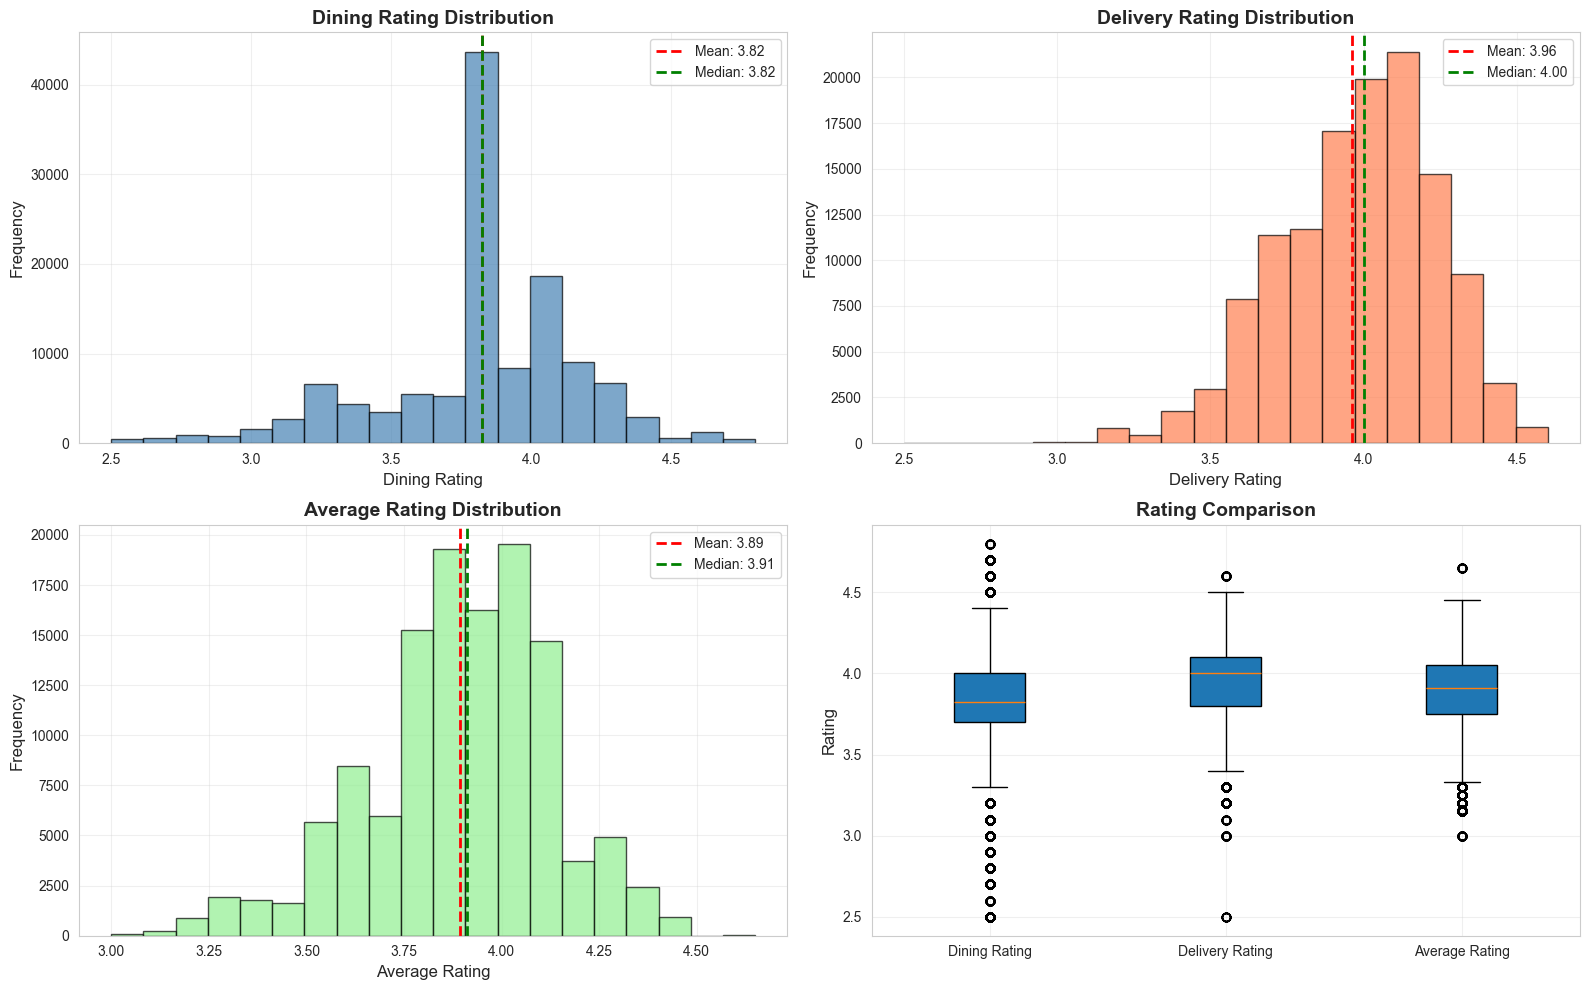

✓ Rating plots created

PRICE ANALYSIS
Count: 123,657
Mean: ₹241.38
Median: ₹208.57
Std Dev: ₹192.83
Min: ₹0.95
Max: ₹12024.00

Price percentiles
25th : ₹130.00
50th : ₹208.57
75th : ₹299.00
90th : ₹409.00
95th : ₹529.66
99th : ₹929.00

Skewness : 6.81
→ Highly right-skewed (most items cheap, few expensive)

--- Graphs ---


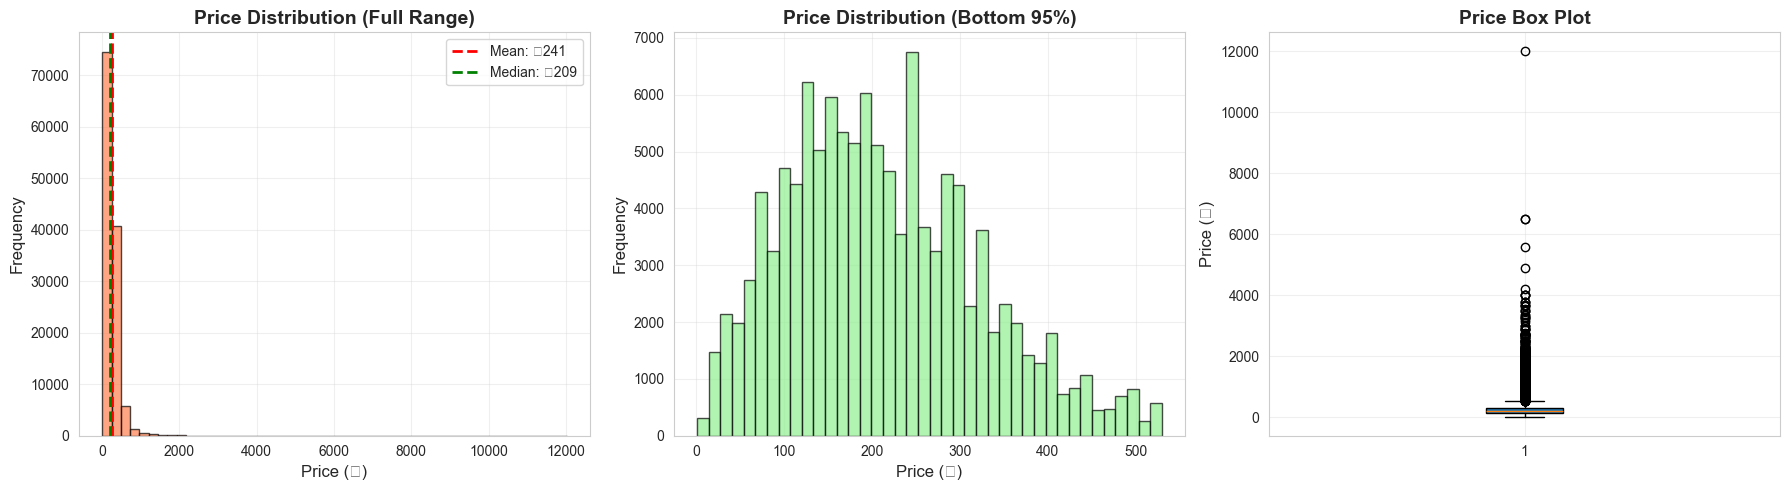


--- Price Range Distribution ---
  ₹0-100: 19,925 items (16.1%)
  ₹100-200: 41,175 items (33.3%)
  ₹200-300: 33,801 items (27.3%)
  ₹300-500: 21,739 items (17.6%)
  ₹500-1000: 6,039 items (4.9%)
  ₹1000+: 978 items (0.8%)
✓ Price plots created

CATEGORY ANALYSIS

--- Top 10 Cities ---
  Hyderabad : 15,613 items (12.6%)
  Jaipur : 14,438 items (11.7%)
  Mumbai : 13,535 items (10.9%)
  Chennai : 13,100 items (10.6%)
  Bangalore : 12,040 items (9.7%)
  Ahmedabad : 10,178 items (8.2%)
  Kolkata : 8,662 items (7.0%)
  Pune : 8,067 items (6.5%)
  Kochi : 7,759 items (6.3%)
  Raipur : 7,700 items (6.2%)

--- Top 10 Cuisines ---
  Beverages: 39,441 items (31.9%)
  Pizza: 15,044 items (12.2%)
  Fast Food: 11,878 items (9.6%)
  Desserts: 11,773 items (9.5%)
  Chinese: 6,046 items (4.9%)
  Sichuan: 5,461 items (4.4%)
  Biryani: 4,100 items (3.3%)
  Shake: 3,321 items (2.7%)
  North Indian: 3,274 items (2.6%)
  Street Food: 2,875 items (2.3%)

---Bestseller Distribution ---
 Bestseller : 123,657 

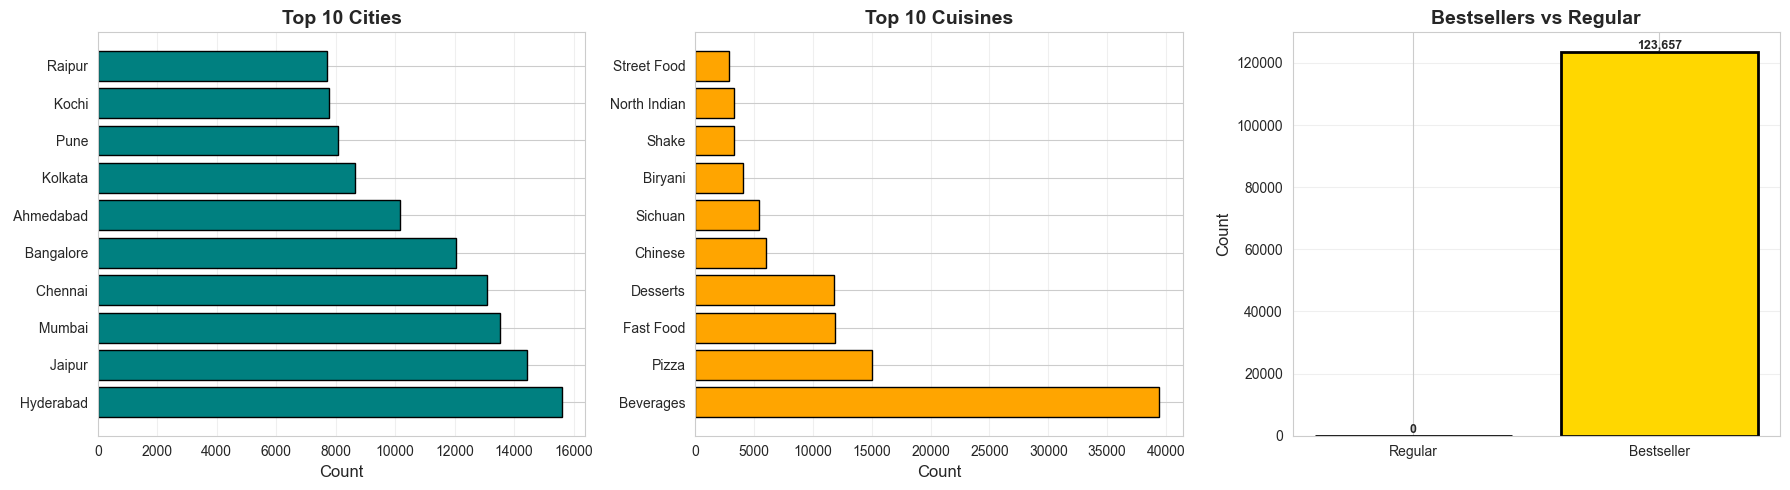

✓ Category plots created

DINING Vs DELIVERY COMPARISON

Analyzing 123,657 items with both ratings

Dining Mean: 3.82
Delivery Mean: 3.96
Difference: 0.14
Correlation: 0.257

Mean Gap (Dining - Delivery): -0.14


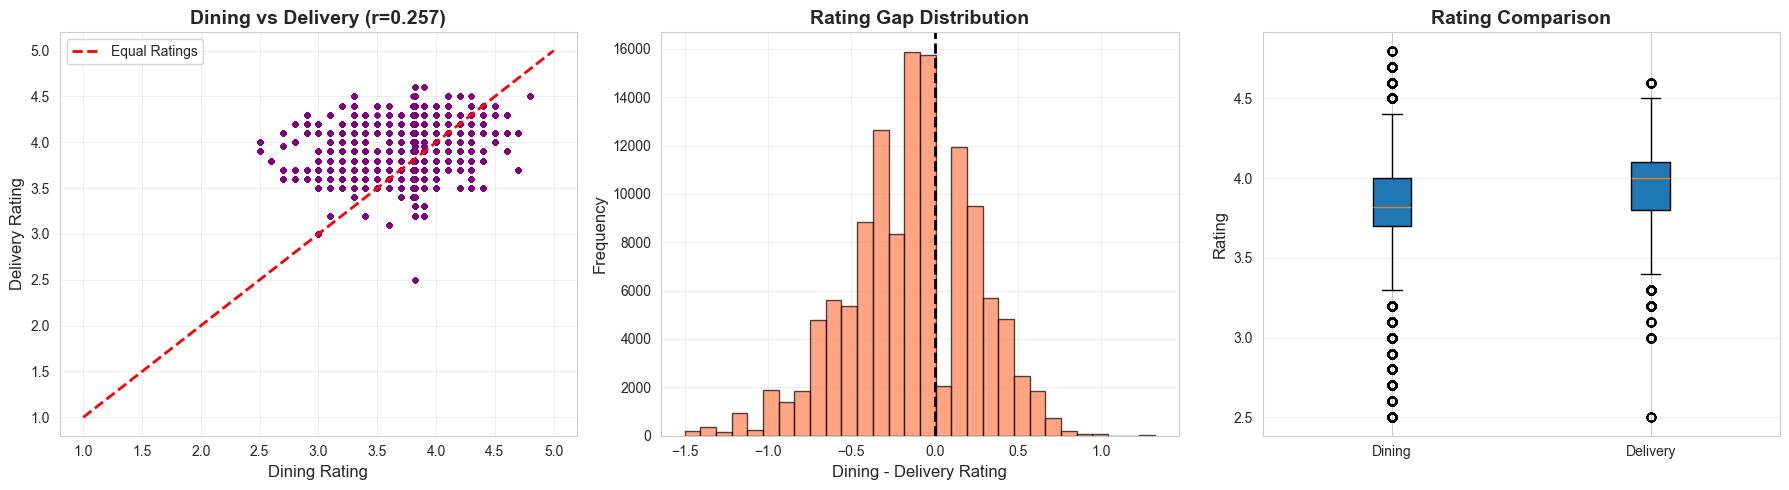

✓ Dining vs Delivery plots created

PRICE Vs RATING RELATION
→ Very weak correlation (price doesn't predict rating)

--- Creating Price vs Rating Visualizations ---


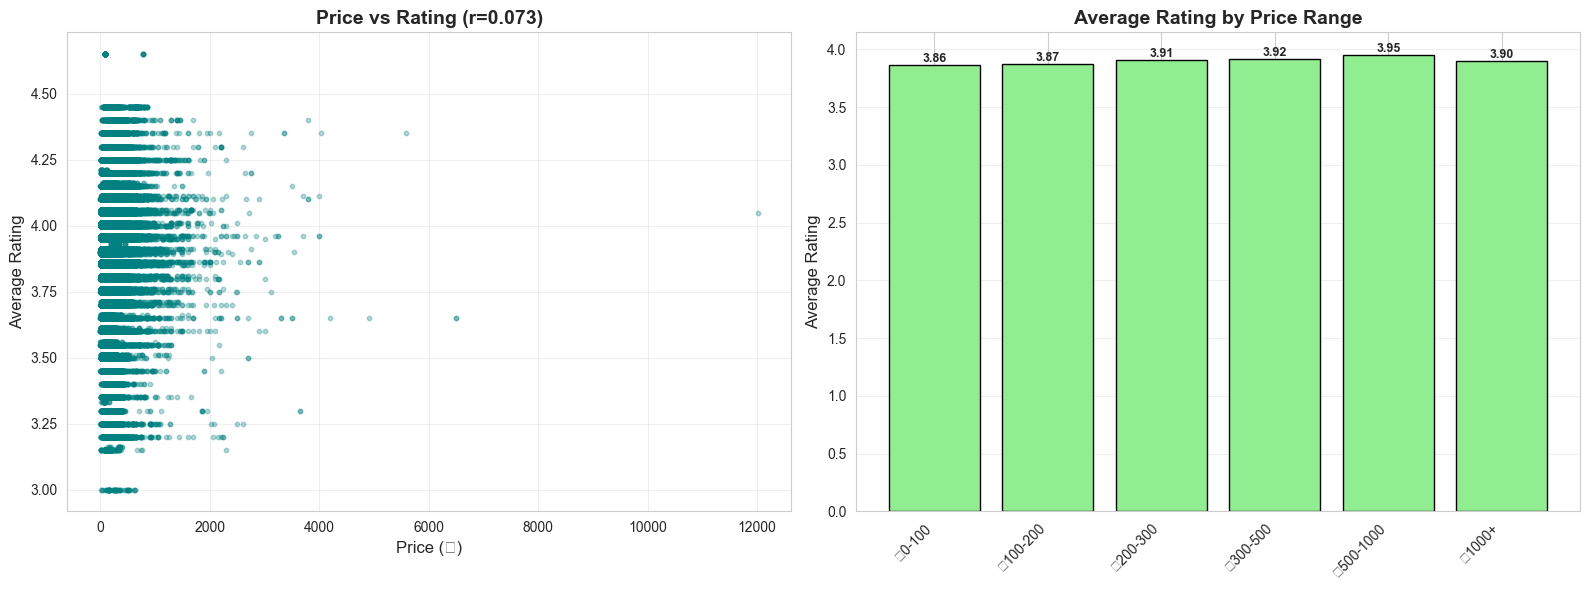


--- Average Rating by Price Range ---
  ₹0-100: 3.86 (n=19,925)
  ₹100-200: 3.87 (n=41,175)
  ₹200-300: 3.91 (n=33,801)
  ₹300-500: 3.92 (n=21,739)
  ₹500-1000: 3.95 (n=6,039)
  ₹1000+: 3.90 (n=978)
✓ Price vs Rating plots created

CUISINE ANALYSIS

Using 82,091 items with 50+ votes
Analyzing 38 cuisines with 10+ items

--- top 10 by Rating ---
 Bakery: 4.15(₹268, 659 items)
 Turkish: 4.10(₹244, 22 items)
 Salad: 4.06(₹270, 75 items)
 Seafood: 4.01(₹313, 517 items)
 North Indian: 4.01(₹196, 2086 items)
 Tibetan: 4.00(₹169, 20 items)
 Ice Cream: 3.97(₹179, 754 items)
 Wraps: 3.96(₹188, 178 items)
 Mexican: 3.96(₹331, 85 items)
 Desserts: 3.94(₹252, 7267 items)

--- Top 10 Most Expensive ---
 Mexican : ₹331(rating : 3.96)
 Kebab : ₹324(rating : 3.89)
 Seafood : ₹313(rating : 4.01)
 Hyderabadi : ₹273(rating : 3.85)
 Biryani : ₹273(rating : 3.91)
 Salad : ₹270(rating : 4.06)
 Bakery : ₹268(rating : 4.15)
 Sichuan : ₹266(rating : 3.87)
 Pasta : ₹260(rating : 3.92)
 Beverages : ₹253(rating 

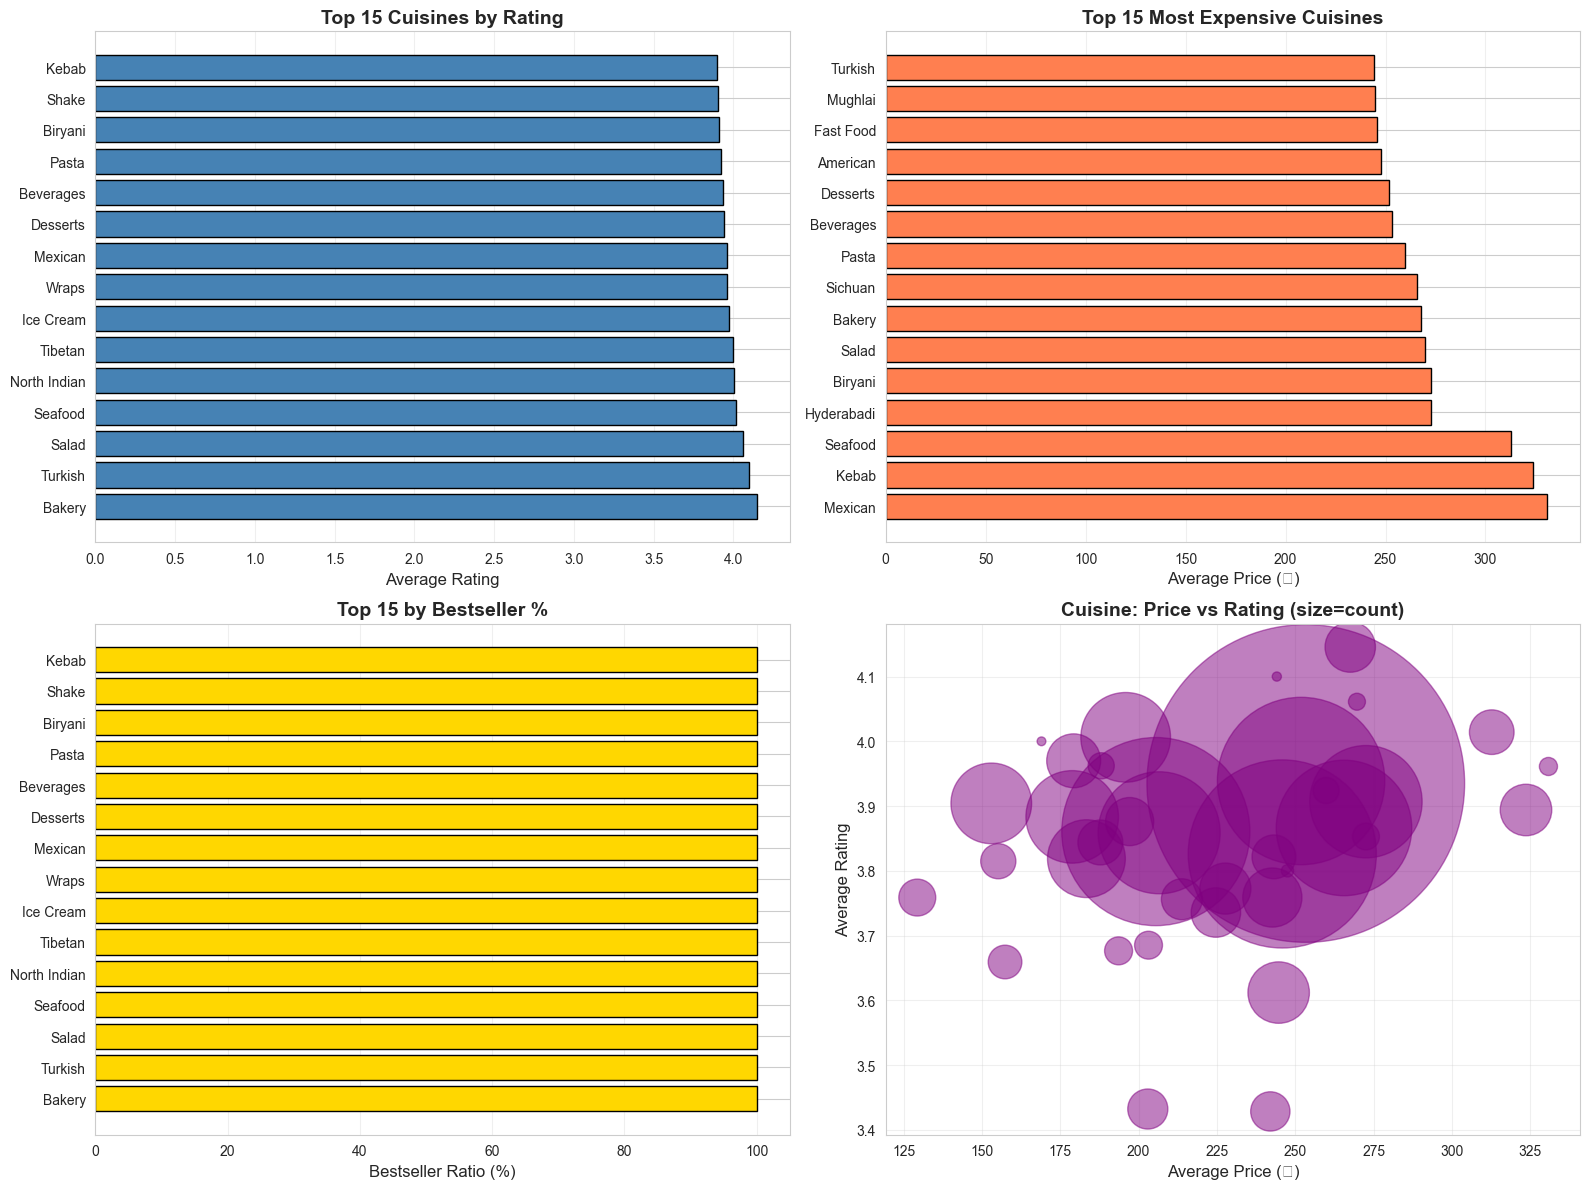

✓ Cuisine plots created

GEOGRAPHIC ANALYSIS

--- Top 10 Cities by Rating ---
   Malleshwaram: 4.00 (₹197, 1 restaurants)
   Lucknow: 3.94 (₹249, 40 restaurants)
   New Delhi: 3.94 (₹231, 17 restaurants)
   Hyderabad: 3.92 (₹236, 75 restaurants)
   Goa: 3.91 (₹241, 14 restaurants)
   Jaipur: 3.90 (₹205, 64 restaurants)
   Chennai: 3.90 (₹262, 63 restaurants)
   Kochi: 3.89 (₹226, 47 restaurants)
   Kolkata: 3.89 (₹239, 32 restaurants)
   Mumbai: 3.88 (₹293, 47 restaurants)

--- Most Expensive Cities ---
   Banaswadi: ₹336 (rating: 3.75)
   Mumbai: ₹293 (rating: 3.88)
   Chennai: ₹262 (rating: 3.90)
   Lucknow: ₹249 (rating: 3.94)
   Goa: ₹241 (rating: 3.91)
   Pune: ₹239 (rating: 3.87)
   Kolkata: ₹239 (rating: 3.89)
   Hyderabad: ₹236 (rating: 3.92)
   New Delhi: ₹231 (rating: 3.94)
   Bangalore: ₹228 (rating: 3.80)

--- Creating City Visualizations ---


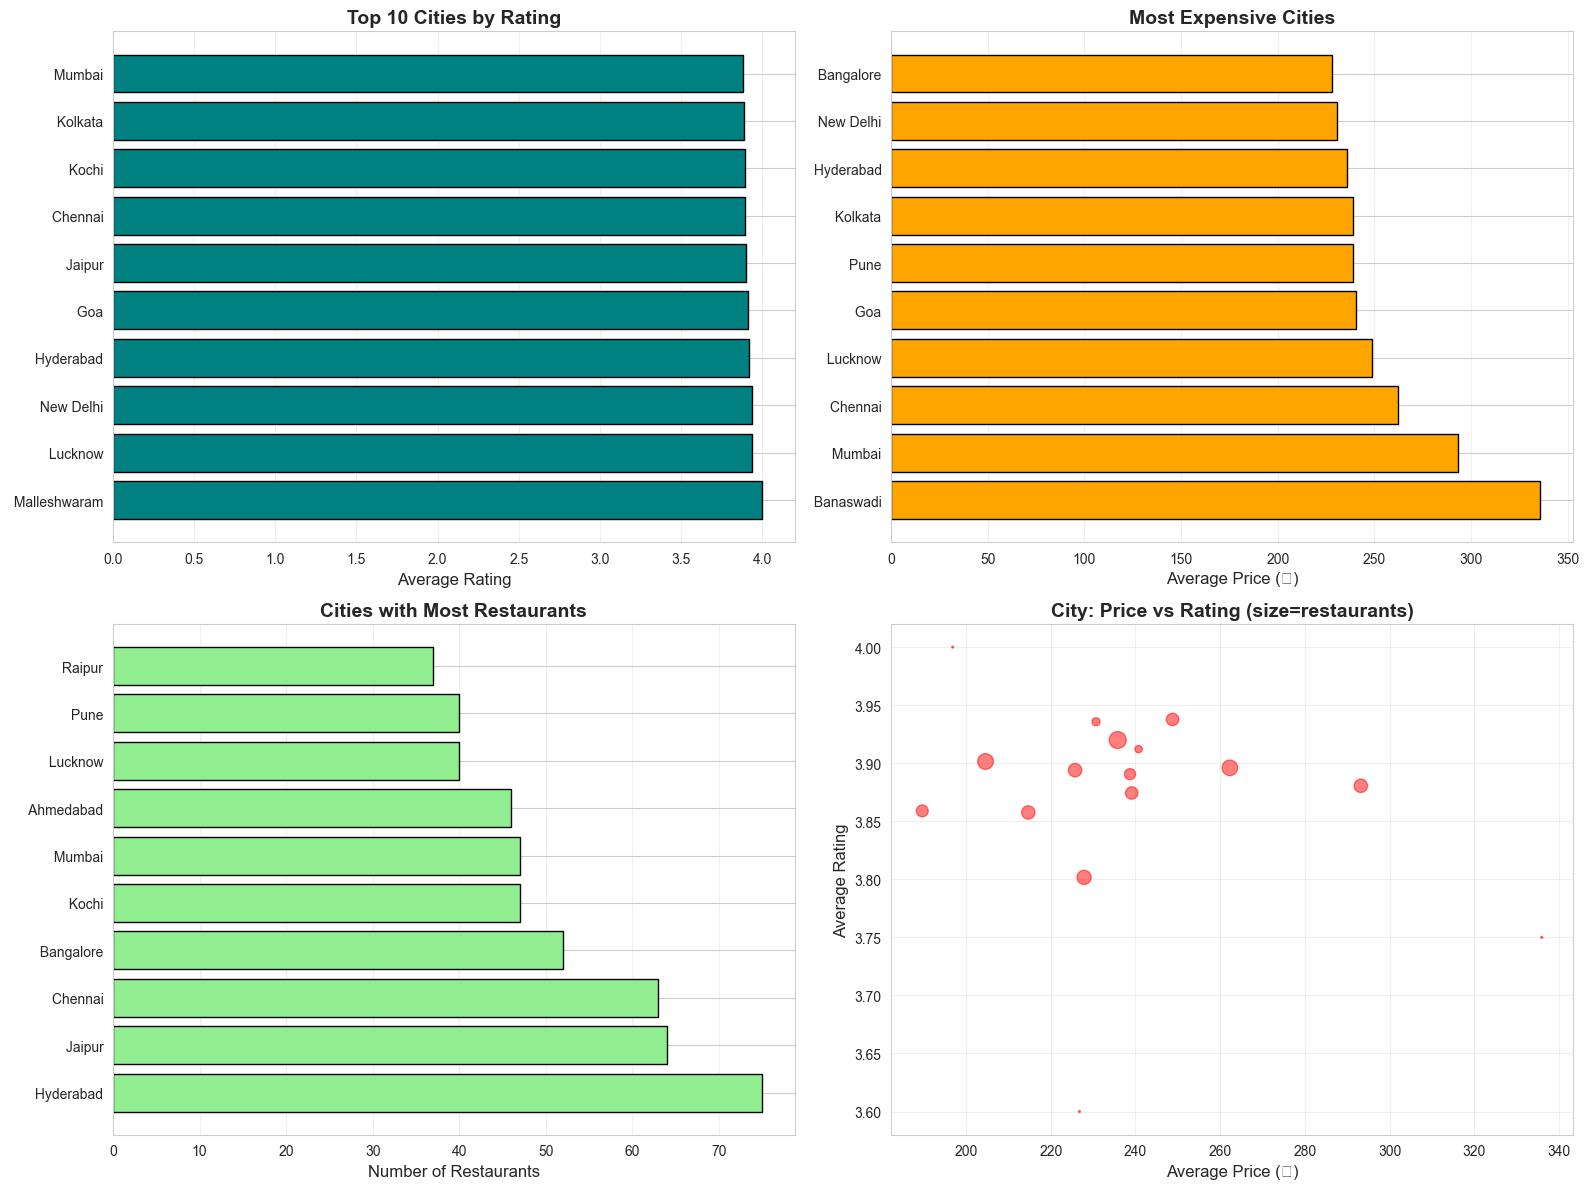

✓ City plots created

RESTAURANT ANALYSIS

Analyzing 536 restaurants

--- Top 20 Restaurants by Rating ---
  Kings Kulfi: 4.45 (125 items,  New Delhi)
  Al Taza: 4.40 (34 items,  Kochi)
  Boojee Cafe: 4.40 (191 items,  Mumbai)
  Toscano: 4.40 (195 items,  Chennai)
  BurgerMan: 4.35 (101 items,  Chennai)
  Cafe 17: 4.35 (189 items,  Kochi)
  Cafe Niloufer: 4.35 (227 items,  Hyderabad)
  Eating Circles: 4.35 (76 items,  Chennai)
  The Hazelnut Factory: 4.35 (301 items,  Lucknow)
  Babal Da Punjabi Dabha: 4.30 (387 items,  Chennai)
  Hotel Navayuga: 4.30 (18 items,  Bangalore)
  Khichdi Etc: 4.30 (116 items,  Ahmedabad)
  Daily Sushi: 4.30 (220 items,  Bangalore)
  Istanbul: 4.30 (39 items,  Hyderabad)
  Kim Ling Chinese Restaurant: 4.30 (297 items,  Chennai)
  Swiss Castle: 4.30 (119 items,  Hyderabad)
  Natural Ice Cream: 4.26 (66 items,  Hyderabad)
  California Burrito: 4.25 (114 items,  Hyderabad)
  Chowman: 4.25 (367 items,  Kolkata)
  Farzi Cafe: 4.25 (53 items,  New Delhi)

--- Res

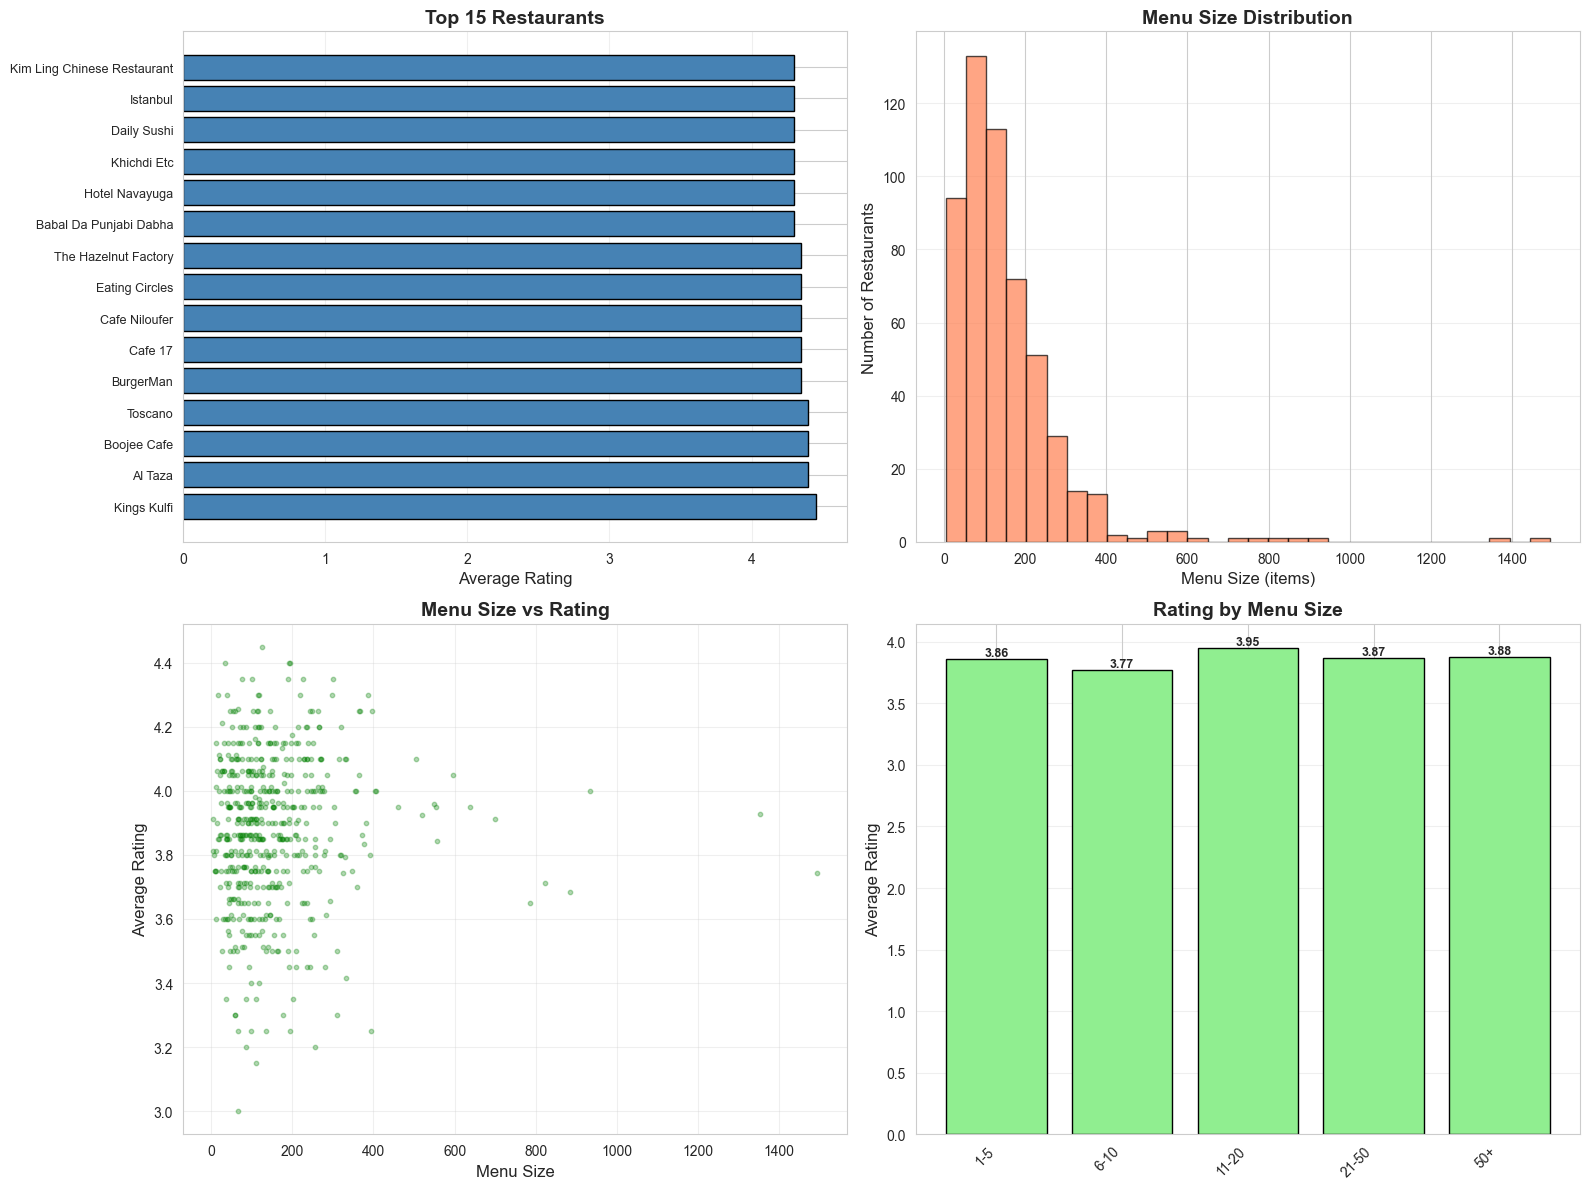

✓ Restaurant plots created

VALUE SEGMENTATION

Median Price: ₹200
Median Rating: 3.91

--- Value Segment Statistics ---

Premium:
  Count: 22,886 (27.9%)
  Avg Rating: 4.08
  Avg Price: ₹351

Great Value:
  Count: 18,376 (22.4%)
  Avg Rating: 4.06
  Avg Price: ₹124

Overpriced:
  Count: 19,213 (23.4%)
  Avg Rating: 3.70
  Avg Price: ₹334

Budget:
  Count: 21,616 (26.3%)
  Avg Rating: 3.70
  Avg Price: ₹123

--- Creating Value Segment Visualizations ---


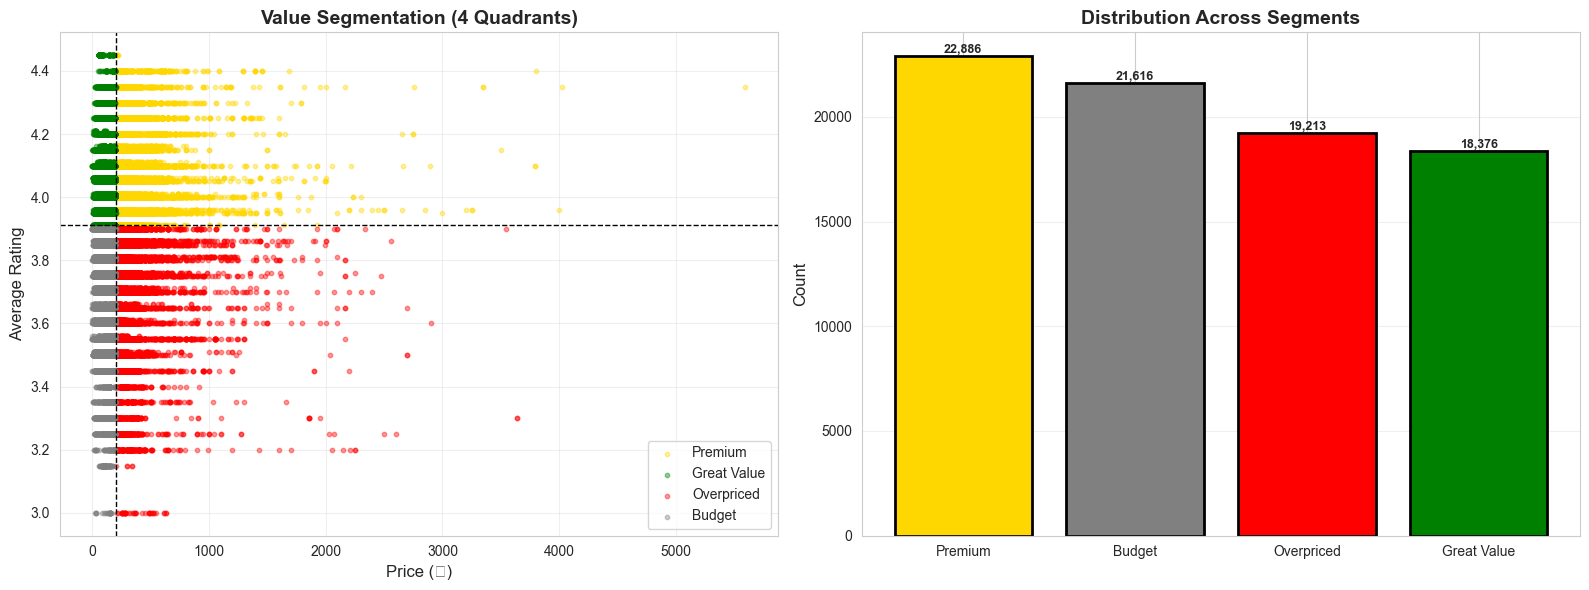

✓ Value segment plots created

BESTSELLER PATTERNS

Bestsellers: 82,091 items
Regular Items: 0 items

--- Characteristic Comparison ---

Average Rating:
  Bestsellers: 3.89
  Regular: nan
  Difference: +nan

Average Price:
  Bestsellers: ₹236.19
  Regular: ₹nan
  Difference: ₹nan

Average Votes:
  Bestsellers: 400
  Regular: nan

Statistical Significance (t-test):
  p-value: nan
  Result: Not significant difference

--- Creating Bestseller Pattern Visualizations ---


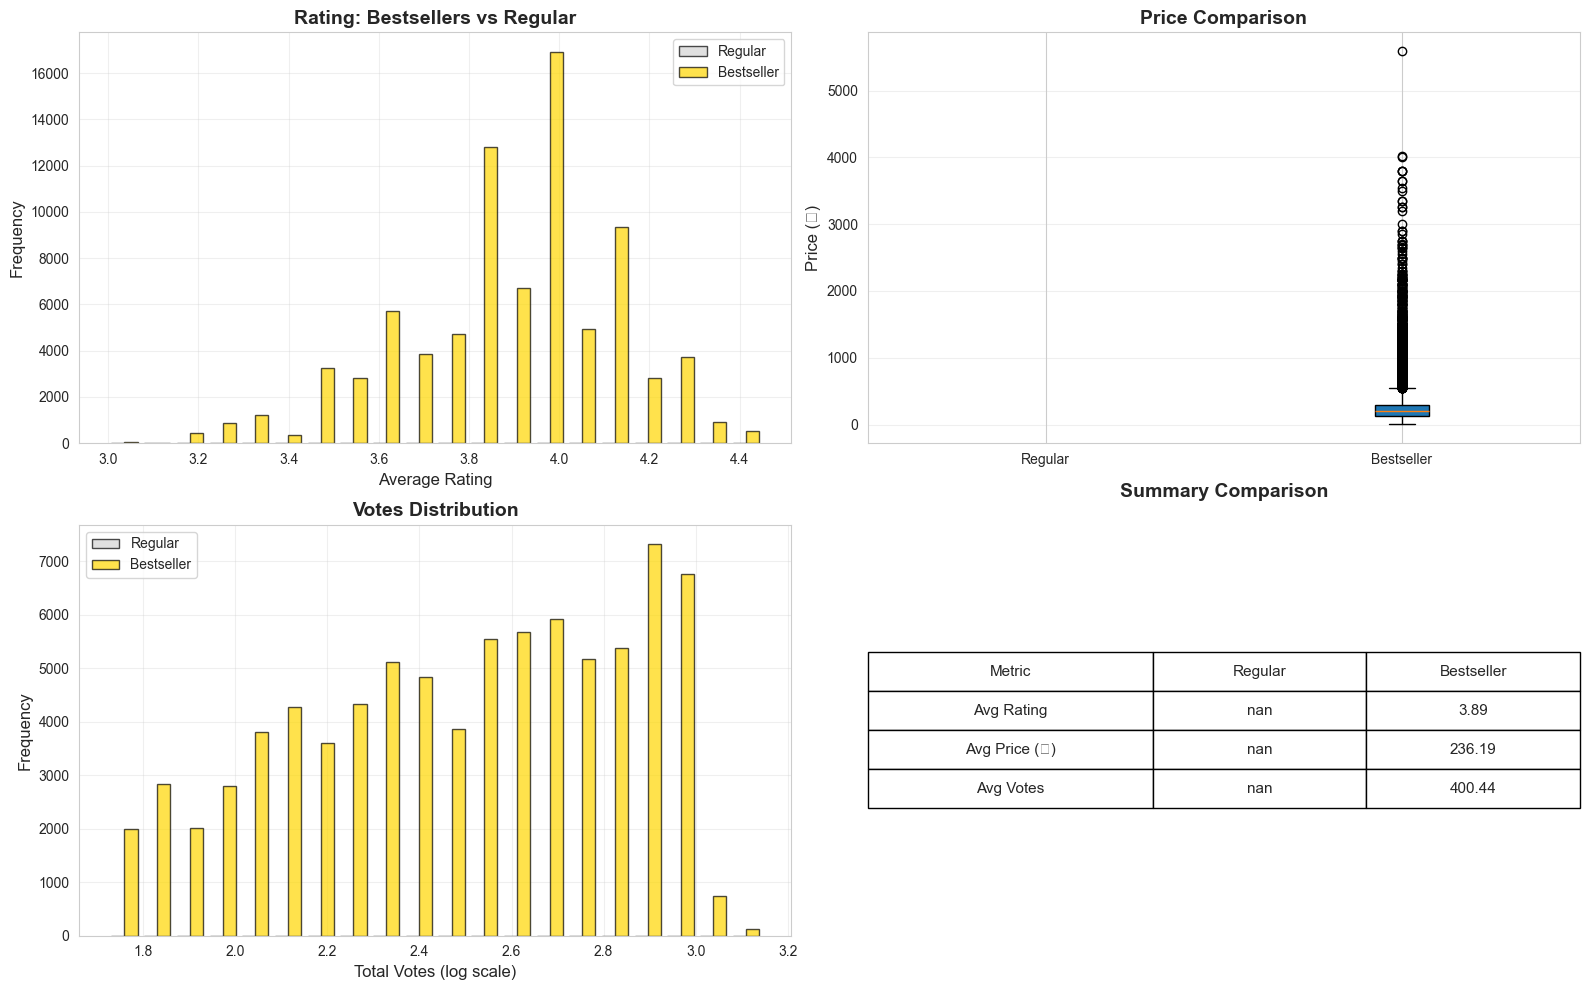

✓ Bestseller pattern plots created

✅ All sections completed successfully!
   Total visualizations: 25+ charts
   Analysis threshold: 50+ votes


In [28]:
if __name__ == "__main__" :
    main()